<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# <u><b>Capstone:</b></u> Recommending adjacent jobs to platfrom delivery riders using NLP and consine similarity

--- 
### Part 2-01: Compare adjacent job - Heavy Truck and Lorry Driver, against base job
---

Heavy Truck and Lorry Drivers drive and tend heavy motor vehicles to transport goods, liquids and heavy materials over short or long distances.

<p><u>1. KNOWLEDGE</u><br>  
(a). <code>Transportation</code>
- movement of people or goods by air, rail, sea, or road
(b). <code>Safety and Government</code>
- public safety and security
- law and government
(c). <code>Business</code>
- customer service
(d). <code>Arts and Humanities</code>
- English language</p>

<p><u>2. SKILLS</u><br>
(a). <code>Basic Skills</code>
- keeping track of how well people and/or groups are doing in order to make improvements
- reading work related information
(b). <code>Problem Solving</code>
- noticing a problem and figuring out the best way to solve it</p>

<p><u>3. ABILITIES</u><br>
(a). <code>Controlled Movement</code>
- change when and how fast you move based on how something else is moving
- quickly change the controls of a machine, car, truck or boat
(b). <code>Spatial</code>
- know where things are around you
- imagine how something will look after it is moved around or changed
(c). <code>Vision</code>
- see details that are far away
- decide which thing is closer or farther away from you or decide how far away it is from you
(d). <code>Attention</code>
- pay attention to something without being distracted</p>

<p><u>4. PERSONALITY</u><br>
People interested in this work like activities that include practical, hands-on problems and solutions. They do well at jobs that need: <code>Attention to Detail</code>, <code>Dependability</code>, <code>Self Control</code>, <code>Stress Tolerance</code>, <code>Cooperation</code>, <code>Integrity</code>

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from wordcloud import WordCloud
from matplotlib_venn import venn2

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity 

# user-defined functions
from eda_utils import show_missing, clean_string, get_top_post

In [2]:
# load scrapped job postings
posts=pd.read_csv('../Data/8332_HeavyVehicleDriver.csv') 

In [3]:
posts

,job_exp_required,job_title,job_ssoc,job_description,job_salary
0,3,CLASS DRIVER,83329,DRIVER AND DELIVERY WORK LOCATION 2 BUROH CRES...,4000.0
1,3,DRIVER LORRY,83321,RESPONSIBILITIES TRANSPORT BINS AND GOODS TO C...,3750.0
2,2,DRIVER,83329,"FOOD MANUFACTURING COMPANY, DUE TO NATURAL OF ...",3000.0
3,2,DRIVER,83329,ROLES &RESPONSIBILITIES TO BE SUCCESSFUL AS A ...,4000.0
4,1,DRIVER,83329,RESPONSIBILITIES DRIVING BETWEEN PICK UP WAREH...,3250.0
...,...,...,...,...,...
7331,2,SEATER VAN DRIVER,83329,JOB DESCRIPTIONS FETCH STAFF FROM DESIGNATED P...,2250.0
7332,5,DRIVER,83329,DESCRIPTION OF JOB TASK AND RESPONSIBILITIES T...,1800.0
7333,2,DRIVER CUM WORKER,83329,JOB SCOPES FETCH WORKER TO & BACK FROM WORK SI...,2550.0
7334,1,FREELANCE PART TIME CLASS A VAN DELIVERY DRIVE...,83329,FREELANCE PART TIME CLASS 3A VAN DELIVERY DRIV...,11.0


In [4]:
posts['job_salary'].quantile([0.25, 0.5, 0.75])

0.25    2300.0
0.50    2850.0
0.75    3250.0
Name: job_salary, dtype: float64

In [5]:
posts['job_exp_required'].quantile([0.25, 0.5, 0.75])

0.25    1.0
0.50    2.0
0.75    3.0
Name: job_exp_required, dtype: float64

In [6]:
posts=posts[['job_description']].copy(deep=True)
posts['job_description']=posts['job_description'].map(lambda x: x.lower().strip())

In [7]:
show_missing(posts)

,variable,dtype,count,nunique,missing,pc_missing
0,job_description,object,7336,7336,0,0.0


In [8]:
# Proprocess title_text
posts['job_desc_proc']=posts['job_description'].map(lambda x: clean_string(x, stem='spacy'))

# have explored using NLTK's stemming and lemmazitaion as well. spaCy's lemmazitation produces better results. 
# spaCy lemmatization is better than NLTK lemmatization as it takes into account part-of-speech tag by default
# lemmatization is better than stemming as context of text is important for this analysis.

In [9]:
posts

,job_description,job_desc_proc
0,driver and delivery work location 2 buroh cres...,delivery location buroh crescent ace buroh sin...
1,responsibilities transport bins and goods to c...,transport bin good customer location timely sa...
2,"food manufacturing company, due to natural of ...",food manufacture company natural business look...
3,roles &responsibilities to be successful as a ...,role responsibilitie successful company ensure...
4,responsibilities driving between pick up wareh...,drive pick warehouse destination deliver goods...
...,...,...
7331,job descriptions fetch staff from designated p...,fetch staff designate pick point worksite coll...
7332,description of job task and responsibilities t...,task shuttle navy officer family member fro de...
7333,job scopes fetch worker to & back from work si...,scope fetch worker site assist purchase constr...
7334,freelance part time class 3a van delivery driv...,freelance time class van delivery hour shift t...


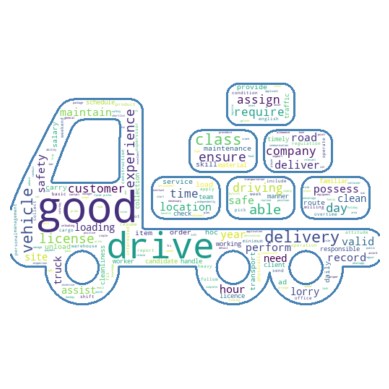

<Figure size 640x480 with 0 Axes>

In [10]:
# Read the whole text.
text = ' '.join(posts['job_desc_proc'])
# read the mask image
van_mask = np.array(Image.open('../Pictures/truck.png'))

wc = WordCloud(background_color="white", max_words=200, mask=van_mask, collocations=False, contour_width=3, contour_color='steelblue')

# generate word cloud
wc.generate(text)

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.show()

In [11]:
# CountVectorizer simply counts the number of times a word appears in a document (using a bag-of-words approach), 
# while TF-IDF Vectorizer takes into account not only how many times a word appears in a document 
# but also how important that word is to the whole corpus. TF-IDF Vectorizer is used below:

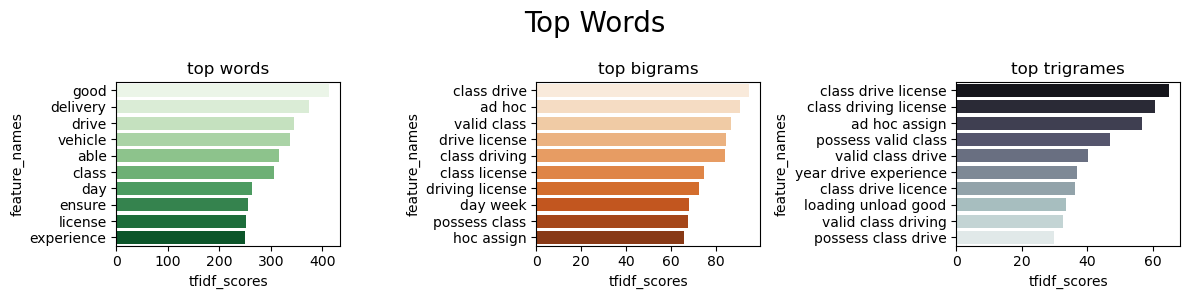

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(12,3))

g1=sns.barplot(data=get_top_post(posts['job_desc_proc'], ngram_range=(1,1), n=10),
               y='feature_names', x='tfidf_scores', ax = ax[0], palette='Greens')
g1.set_title(f'top words')

g2=sns.barplot(data=get_top_post(input=posts['job_desc_proc'], ngram_range=(2,2), n=10),
               y='feature_names', x='tfidf_scores', ax = ax[1], palette='Oranges')
g2.set_title(f'top bigrams')

g3=sns.barplot(data=get_top_post(input=posts['job_desc_proc'], ngram_range=(3,3), n=10),
               y='feature_names', x='tfidf_scores', ax = ax[2], palette='bone')
g3.set_title(f'top trigrames')

plt.suptitle('Top Words', fontsize=20)
plt.tight_layout()

In [13]:
posts.to_csv('../Data/8332_HeavyVehicleDriver_cleaned.csv', index=False) 

In [14]:
posts=pd.read_csv('../Data/8332_HeavyVehicleDriver_cleaned.csv') 
base_posts=pd.read_csv('../Data/8322_GoodsVehicleDriver_cleaned.csv') 

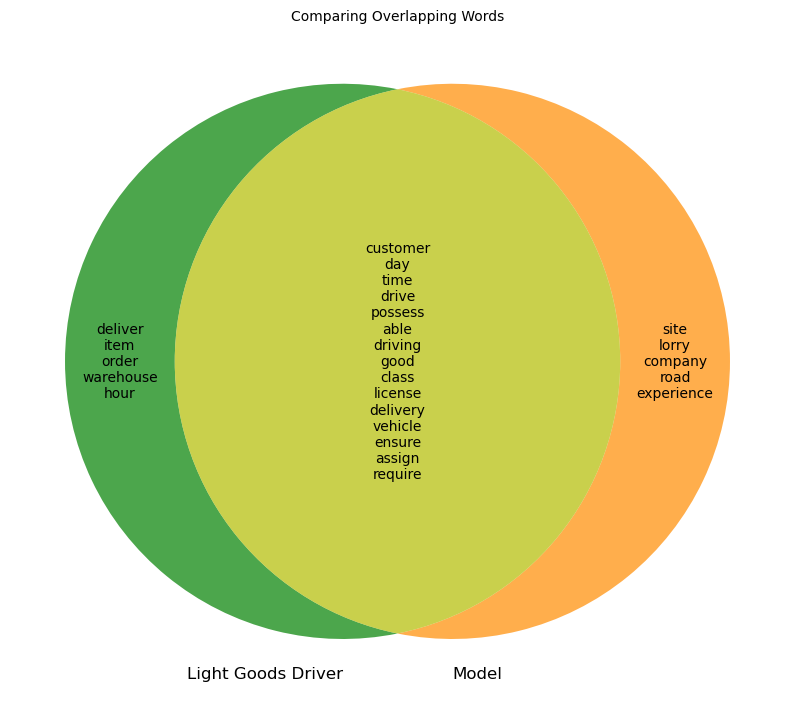

In [18]:
plt.figure(figsize=(10,10))
plt.title('Comparing Overlapping Words',fontsize=10)

set_a = set(get_top_post(input=base_posts['job_desc_proc'],ngram_range=(1,1),n=20)['feature_names'])
set_b = set(get_top_post(input=posts['job_desc_proc'],ngram_range=(1,1),n=20)['feature_names'])

venn = venn2([set_a,set_b],set_labels=['Light Goods Driver','Model'],set_colors=('green', 'darkorange'), alpha = 0.7)
venn.get_label_by_id('100').set_text('\n'.join(map(str,set_a-set_b)))
venn.get_label_by_id('110').set_text('\n'.join(map(str,set_a&set_b)))
venn.get_label_by_id('010').set_text('\n'.join(map(str,set_b-set_a)))

In [16]:
base_top_words_df=get_top_post(base_posts['job_desc_proc'], ngram_range=(1,1), n=1000)
base_top_text = ' '.join(base_top_words_df['feature_names'])

top_words_df=get_top_post(posts['job_desc_proc'], ngram_range=(1,1), n=1000)
top_text = ' '.join(top_words_df['feature_names'])

In [17]:
df=pd.DataFrame(data={'jobs': ['base_job','adjacent_job'], 'top_text' : [base_top_text,top_text]})
count = CountVectorizer()
count_matrix = count.fit_transform(df['top_text'])
cosine_sim = cosine_similarity(count_matrix)
print(cosine_sim)

[[1.    0.817]
 [0.817 1.   ]]
